# Laboratorio 10: Procesamiento EEG

### En este dataset se presentan las señales de dos experimentos:
### Experimento 1: Reposo, ojos abiertos
### Experimento 2: Reposo, ojos cerrados
### Analizaremos las señales correspondientes al sujeto 1 en ambos experimentos, para evaluar cómo afecta el tener los ojos abiertos o cerrados en las señales EEG.

#### Dataset: https://physionet.org/content/auditory-eeg/1.0.0/

## Experimento 1 (reposo, ojos abiertos), sujeto 1

In [117]:
import mne
import numpy as np
import pandas as pd
import pywt
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
from scipy.signal import welch

# Cargar archivo del dataset
Fs=200
raw_fname = "C:\ISB\s01_ex01_s02.txt"
df = pd.read_csv(raw_fname)
#En el dataset se menciona: 
# "The electrodes were placed on the T7, F8, Cz, and P4 positions according to the 10/10 international EEG system"
canales1 = ["T7", "F8", "Cz", "P4"]
#En el dataset se menciona: 
# Each file in the raw data contains additional columns that can be discarded, 
# but it was kept for the purpose of providing raw recording files. 
# The important columns are the first five: Sample index and four EEG channels.
canales=df.columns[1:5]
info = mne.create_info(canales1, Fs, ch_types="eeg")
data_values = df[canales].values.T
raw = mne.io.RawArray(data_values, info)


#Mostrar señal antes de ser filtrada
raw.plot_psd()

# ICA works best with a highpass filter applied (valor típico lfreq=1)
raw.filter(l_freq=1.0, h_freq=None)
#Se muestra la señal posterior al filtrado
raw.plot_psd()
#Preprocesamiento de la señal ICA
ica = mne.preprocessing.ICA(
    n_components=4, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)


#Creando raw
canales1 = ["T7", "F8", "Cz", "P4"] 
canales=df.columns[1:5]
info = mne.create_info(canales1, Fs, ch_types="eeg")
data_values = df[canales].values.T
raw = mne.io.RawArray(data_values, info)


montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
# ICA works best with a highpass filter applied (valor típico lfreq=1)
raw.filter(l_freq=1.0, h_freq=None)

ica = mne.preprocessing.ICA(
    n_components=4, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)
ica.plot_sources(raw)

Creating RawArray with float64 data, n_channels=4, n_times=37409
    Range : 0 ... 37408 =      0.000 ...   187.040 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 661 samples (3.305 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).


<>:11: SyntaxWarning: invalid escape sequence '\I'
<>:11: SyntaxWarning: invalid escape sequence '\I'
C:\Users\romin\AppData\Local\Temp\ipykernel_3324\3607217868.py:11: SyntaxWarning: invalid escape sequence '\I'
  raw_fname = "C:\ISB\s01_ex01_s02.txt"
C:\Users\romin\AppData\Local\Temp\ipykernel_3324\3607217868.py:27: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
C:\Users\romin\AppData\Local\Temp\ipykernel_3324\3607217868.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
c:\Users\romin\mne-python\1.7.0_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\romin\AppData\Local\Temp\ipykernel_3324\3607217868.py:32: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 0.2s.
Creating RawArray with float64 data, n_channels=4, n_times=37409
    Range : 0 ... 37408 =      0.000 ...   187.040 secs
Ready.


C:\Users\romin\AppData\Local\Temp\ipykernel_3324\3607217868.py:32: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
c:\Users\romin\mne-python\1.7.0_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 661 samples (3.305 s)

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 0.2s.
Creating RawArray with float64 data, n_channels=4, n_times=37409
    Range : 0 ... 37408 =      0.000 ...   187.040 secs
Ready.


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
93 matching events found
No baseline correction applied
0 projection items activated


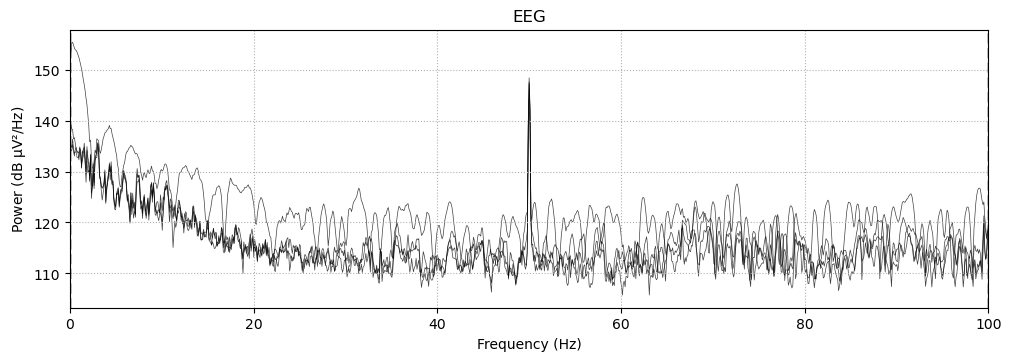

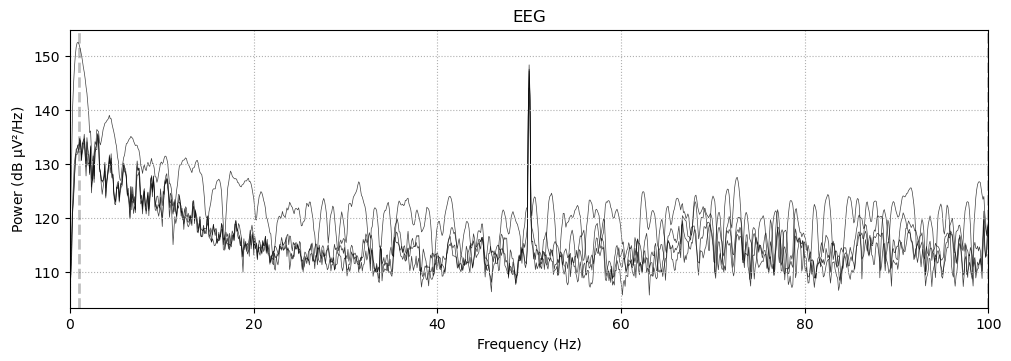

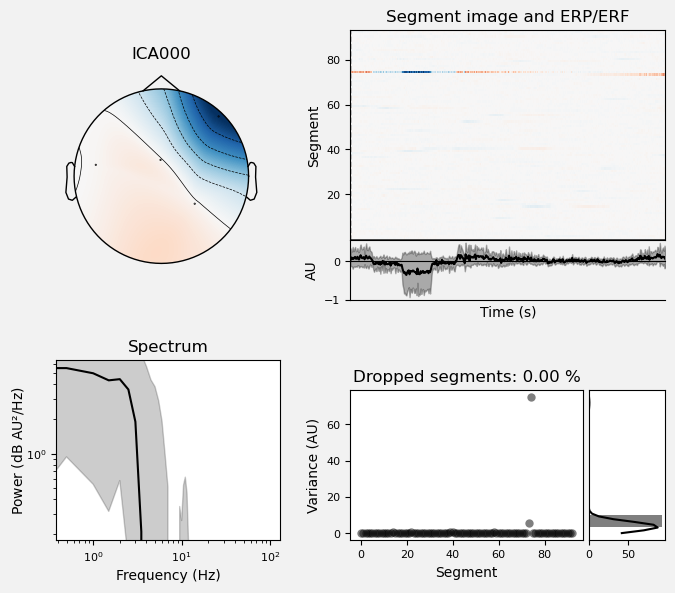

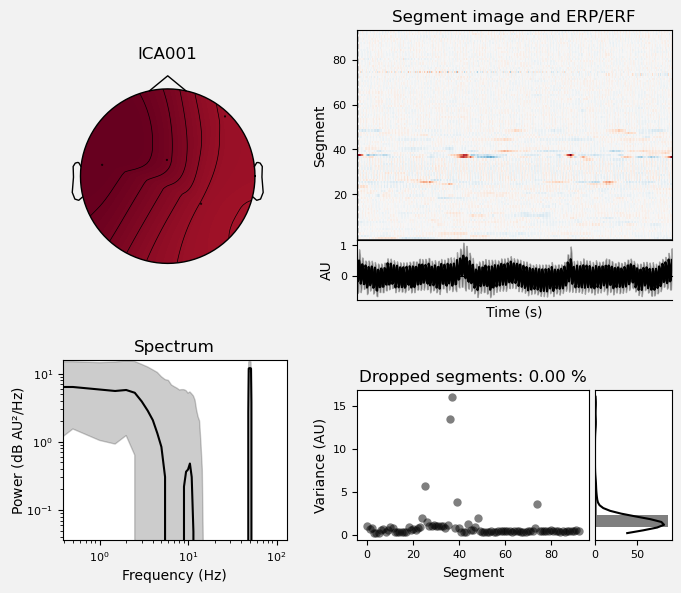

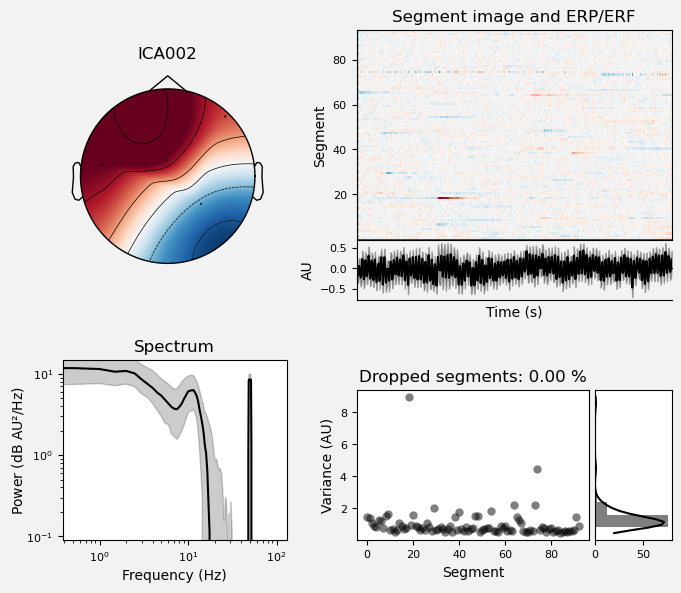

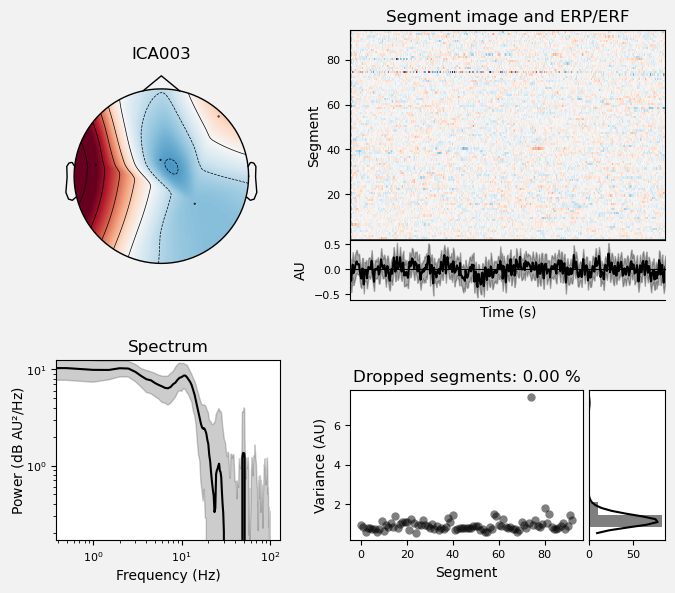

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [118]:
idx = [0, 1, 2, 3]
ica.plot_properties(raw, picks=idx, log_scale=True)

Effective window size : 10.240 (s)
Automatically found muscle artifact ICA components: []


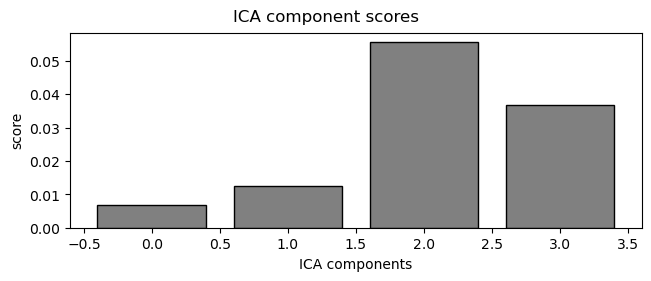

Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 4 PCA components


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,7 points
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,1.00 Hz
Lowpass,100.00 Hz


In [119]:
# Identificar automáticamente artefactos musculares
muscle_idx_auto, scores = ica.find_bads_muscle(raw)
print("Automatically found muscle artifact ICA components: "
        f"{muscle_idx_auto}")
ica.plot_scores(scores, exclude=muscle_idx_auto)
# Aplicar ICA para eliminar componentes de artefactos identificados
ica.apply(raw, exclude=muscle_idx_auto)


### Extracción de características usando Wavelet sym6

In [120]:
import pywt
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

def calcular_dwt(senal):
    # Realizar la descomposición en wavelets
    coeffs = pywt.wavedec(senal, 'sym6', level=5)
    
    return coeffs

def calculate_features(coeffs):
    all_coeffs = np.concatenate(coeffs)

    rms_total = np.sqrt(np.mean(np.square(all_coeffs)))
    min_total = np.min(all_coeffs)
    max_total = np.max(all_coeffs)
    median_total = np.median(all_coeffs)
    std_dev_total = np.std(all_coeffs)
   
    curt = kurtosis(all_coeffs)
    energy = np.sum(all_coeffs ** 2)
    return rms_total, min_total, max_total, median_total, std_dev_total, curt, energy

# Calcular y mostrar las características para cada canal
canales = df.iloc[:, 1:5]
canal0 = canales.iloc[:, 0]
canal1 = canales.iloc[:, 1]
canal2 = canales.iloc[:, 2]
canal3 = canales.iloc[:, 3]


coeffs_c0= calcular_dwt(canal0)
coeffs_c1= calcular_dwt(canal1)
coeffs_c2= calcular_dwt(canal2)
coeffs_c3= calcular_dwt(canal3)

features_c0 = calculate_features(coeffs_c0)
features_c1 = calculate_features(coeffs_c1)
features_c2 = calculate_features(coeffs_c2)
features_c3 = calculate_features(coeffs_c3)

features_list = []
columns = ["Canal", "RMS", "Mínimo", "Máximo", "Mediana", "Desviación Estándar", "Curtosis", "Energía"]
features_df1 = pd.DataFrame(columns=columns)

num_canal = [0,1,2,3]
for i in num_canal:
    signal = canales.iloc[:, i]
    coeffs = calcular_dwt(signal)
    features = calculate_features(coeffs)
    features_list.append({
        "Canal": i,
        "RMS": features[0],
        "Mínimo": features[1],
        "Máximo": features[2],
        "Mediana": features[3],
        "Desviación Estándar": features[4],
        "Curtosis": features[5],
        "Energía": features[6]
    })
features_df1 = pd.DataFrame(features_list)
  
print(features_df1)

# Liberar memoria
del raw

   Canal          RMS       Mínimo       Máximo   Mediana  \
0      0   514.792964  -449.390979  3418.671354  1.525018   
1      1  1001.275145 -6128.412693   872.597859  0.326343   
2      2   395.855804  -430.541306  2723.358676  1.655003   
3      3   333.481774  -403.918487  2334.658987  1.282826   

   Desviación Estándar   Curtosis       Energía  
0           506.514676  26.811046  9.927607e+09  
1           985.525104  26.881307  3.755660e+10  
2           389.458371  26.816960  5.870207e+09  
3           328.089867  26.875982  4.166041e+09  


## Experimento 2 (reposo, ojos cerrados), sujeto 1

In [121]:
import mne
import numpy as np
import pandas as pd
import pywt
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
from scipy.signal import welch

# Cargar archivo del dataset
Fs=200
raw_fname = "C:\ISB\s01_ex02_s02.txt"
df = pd.read_csv(raw_fname)
#En el dataset se menciona: 
# "The electrodes were placed on the T7, F8, Cz, and P4 positions according to the 10/10 international EEG system"
canales1 = ["T7", "F8", "Cz", "P4"]
#En el dataset se menciona: 
# Each file in the raw data contains additional columns that can be discarded, 
# but it was kept for the purpose of providing raw recording files. 
# The important columns are the first five: Sample index and four EEG channels.
canales=df.columns[1:5]
info = mne.create_info(canales1, Fs, ch_types="eeg")
data_values = df[canales].values.T
raw = mne.io.RawArray(data_values, info)


#Mostrar señal antes de ser filtrada
raw.plot_psd()

# ICA works best with a highpass filter applied (valor típico lfreq=1)
raw.filter(l_freq=1.0, h_freq=None)
#Se muestra la señal posterior al filtrado
raw.plot_psd()
#Preprocesamiento de la señal ICA
ica = mne.preprocessing.ICA(
    n_components=4, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)


#Creando raw
canales1 = ["T7", "F8", "Cz", "P4"] 
canales=df.columns[1:5]
info = mne.create_info(canales1, Fs, ch_types="eeg")
data_values = df[canales].values.T
raw = mne.io.RawArray(data_values, info)


montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)
# ICA works best with a highpass filter applied (valor típico lfreq=1)
raw.filter(l_freq=1.0, h_freq=None)

ica = mne.preprocessing.ICA(
    n_components=4, method="picard", max_iter="auto", random_state=97
)
ica.fit(raw)
ica.plot_sources(raw)

Creating RawArray with float64 data, n_channels=4, n_times=37957
    Range : 0 ... 37956 =      0.000 ...   189.780 secs
Ready.
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 661 samples (3.305 s)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 10.240 (s)
Plotting power spectral density (dB=True).


<>:11: SyntaxWarning: invalid escape sequence '\I'
<>:11: SyntaxWarning: invalid escape sequence '\I'
C:\Users\romin\AppData\Local\Temp\ipykernel_3324\311274069.py:11: SyntaxWarning: invalid escape sequence '\I'
  raw_fname = "C:\ISB\s01_ex02_s02.txt"
C:\Users\romin\AppData\Local\Temp\ipykernel_3324\311274069.py:27: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd()
C:\Users\romin\AppData\Local\Temp\ipykernel_3324\311274069.py:27: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
c:\Users\romin\mne-python\1.7.0_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
C:\Users\romin\AppData\Local\Temp\ipykernel_3324\311274069.py:32: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  raw.plot_psd(

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components


C:\Users\romin\AppData\Local\Temp\ipykernel_3324\311274069.py:32: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
c:\Users\romin\mne-python\1.7.0_0\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Fitting ICA took 0.5s.
Creating RawArray with float64 data, n_channels=4, n_times=37957
    Range : 0 ... 37956 =      0.000 ...   189.780 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 661 samples (3.305 s)

Fitting ICA to data using 4 channels (please be patient, this may take a while)
Selecting by number: 4 components
Fitting ICA took 0.5s.
Creating RawArray with float64 data, n_channels=4, n_times=37957
    Range : 0 ... 37956 =      0.000 ...   189.780 secs
Ready.


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
94 matching events found
No baseline correction applied
0 projection items activated


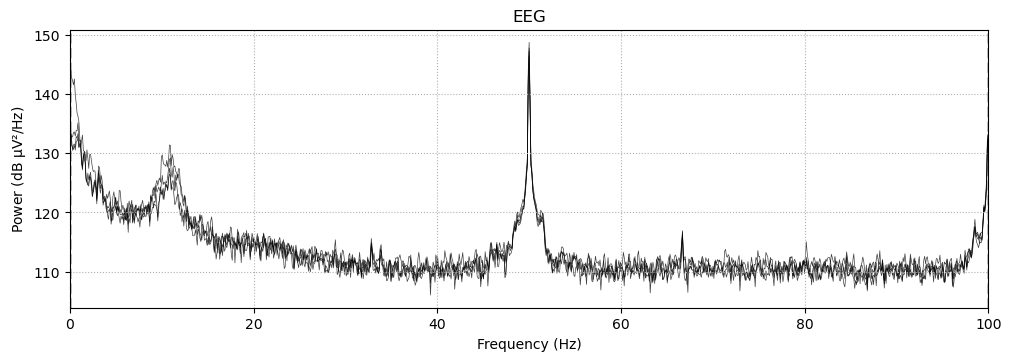

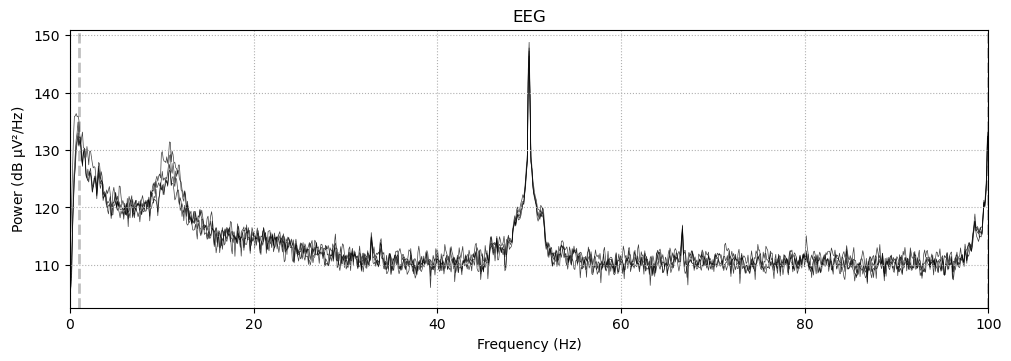

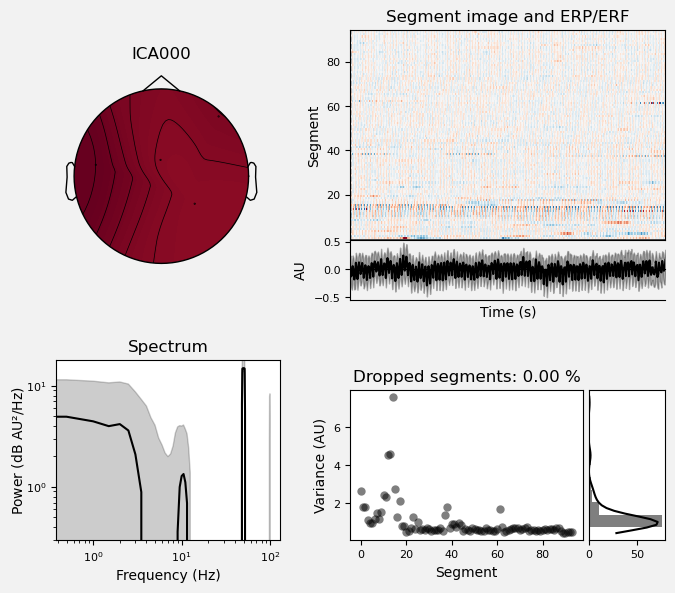

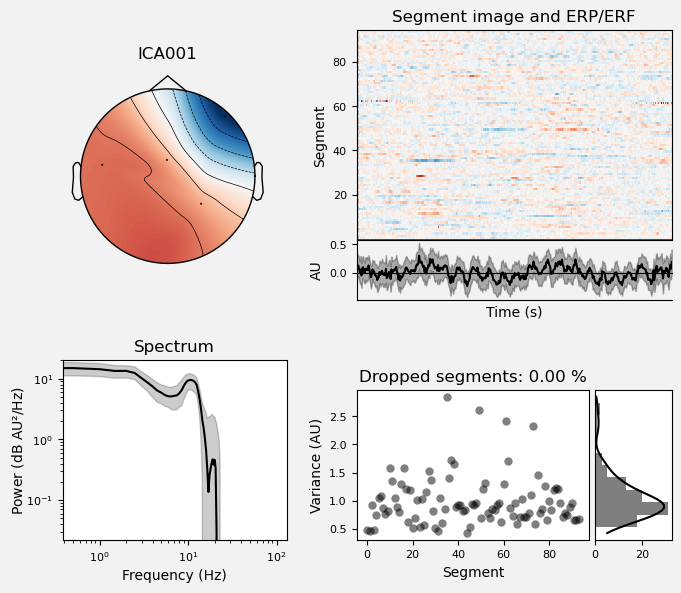

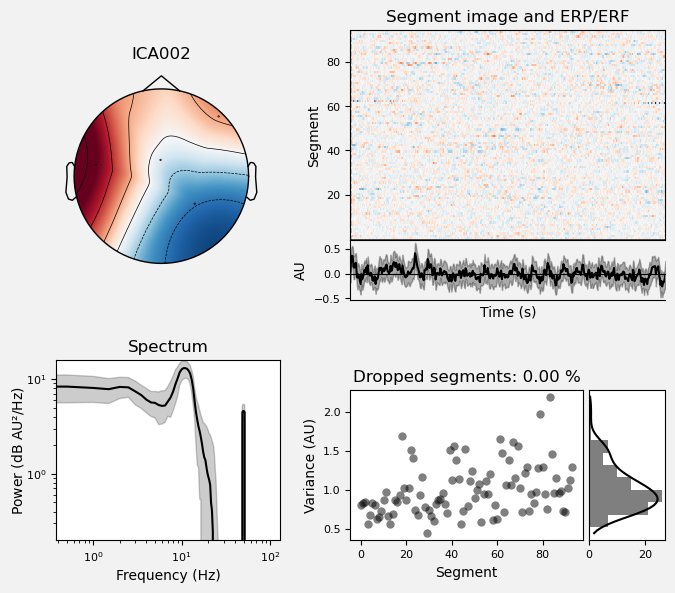

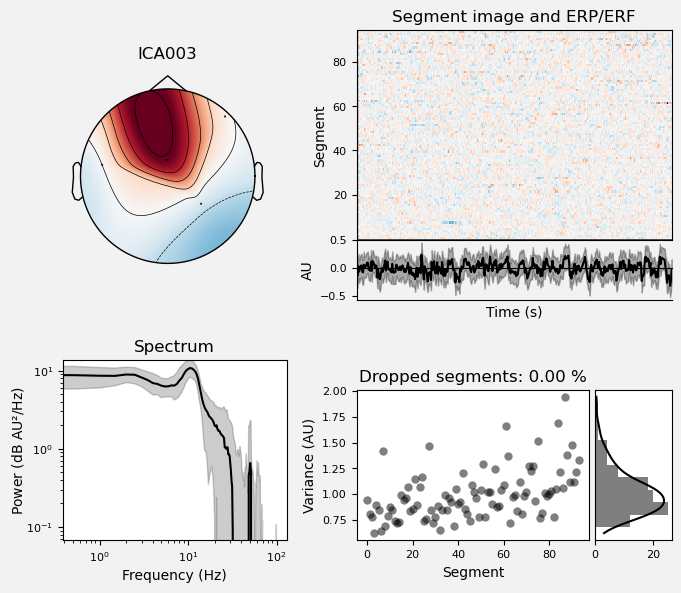

[<Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>,
 <Figure size 700x600 with 6 Axes>]

In [122]:
idx = [0, 1, 2, 3]
ica.plot_properties(raw, picks=idx, log_scale=True)

Effective window size : 10.240 (s)
Automatically found muscle artifact ICA components: []


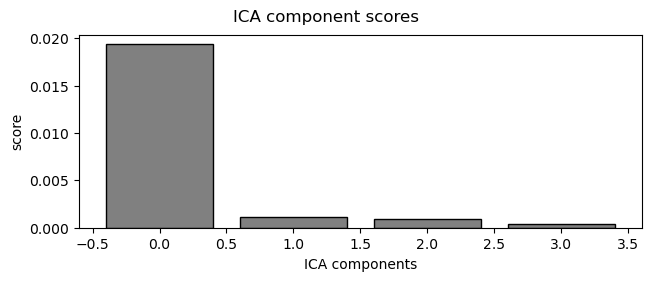

Applying ICA to Raw instance
    Transforming to ICA space (4 components)
    Zeroing out 0 ICA components
    Projecting back using 4 PCA components


Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,7 points
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,200.00 Hz
Highpass,1.00 Hz
Lowpass,100.00 Hz


In [123]:
# Identificar automáticamente artefactos musculares
muscle_idx_auto, scores = ica.find_bads_muscle(raw)
print("Automatically found muscle artifact ICA components: "
        f"{muscle_idx_auto}")
ica.plot_scores(scores, exclude=muscle_idx_auto)
# Aplicar ICA para eliminar componentes de artefactos identificados
ica.apply(raw, exclude=muscle_idx_auto)


In [124]:
import pywt
import matplotlib.pyplot as plt
from scipy.stats import kurtosis

def calcular_dwt(senal):
    # Realizar la descomposición en wavelets
    coeffs = pywt.wavedec(senal, 'sym6', level=5)
    
    return coeffs

def calculate_features(coeffs):
    all_coeffs = np.concatenate(coeffs)

    rms_total = np.sqrt(np.mean(np.square(all_coeffs)))
    min_total = np.min(all_coeffs)
    max_total = np.max(all_coeffs)
    median_total = np.median(all_coeffs)
    std_dev_total = np.std(all_coeffs)
   
    curt = kurtosis(all_coeffs)
    energy = np.sum(all_coeffs ** 2)
    return rms_total, min_total, max_total, median_total, std_dev_total, curt, energy

# Calcular y mostrar las características para cada canal
canales = df.iloc[:, 1:5]
canal0 = canales.iloc[:, 0]
canal1 = canales.iloc[:, 1]
canal2 = canales.iloc[:, 2]
canal3 = canales.iloc[:, 3]


coeffs_c0= calcular_dwt(canal0)
coeffs_c1= calcular_dwt(canal1)
coeffs_c2= calcular_dwt(canal2)
coeffs_c3= calcular_dwt(canal3)

features_c0 = calculate_features(coeffs_c0)
features_c1 = calculate_features(coeffs_c1)
features_c2 = calculate_features(coeffs_c2)
features_c3 = calculate_features(coeffs_c3)

features_list = []
columns = ["Canal", "RMS", "Mínimo", "Máximo", "Mediana", "Desviación Estándar", "Curtosis", "Energía"]
features_df2 = pd.DataFrame(columns=columns)

num_canal = [0,1,2,3]
for i in num_canal:
    signal = canales.iloc[:, i]
    coeffs = calcular_dwt(signal)
    features = calculate_features(coeffs)
    features_list.append({
        "Canal": i,
        "RMS": features[0],
        "Mínimo": features[1],
        "Máximo": features[2],
        "Mediana": features[3],
        "Desviación Estándar": features[4],
        "Curtosis": features[5],
        "Energía": features[6]
    })
features_df2 = pd.DataFrame(features_list)
  
print(features_df2)
    
# Liberar memoria
del raw

   Canal         RMS       Mínimo       Máximo   Mediana  Desviación Estándar  \
0      0  500.782513  -107.880317  3079.707389 -0.215956           492.842757   
1      1  991.648465 -5861.649223   112.509565 -1.246394           975.939625   
2      2  365.912670   -94.371965  2283.189108  0.089119           360.095058   
3      3  380.232050  -103.324736  2304.299202  0.117968           374.182096   

    Curtosis       Energía  
0  26.800438  9.532016e+09  
1  26.824156  3.737678e+10  
2  26.799758  5.089104e+09  
3  26.800828  5.495205e+09  


In [125]:
# comparación
print(features_df1)
print(features_df2)

   Canal          RMS       Mínimo       Máximo   Mediana  \
0      0   514.792964  -449.390979  3418.671354  1.525018   
1      1  1001.275145 -6128.412693   872.597859  0.326343   
2      2   395.855804  -430.541306  2723.358676  1.655003   
3      3   333.481774  -403.918487  2334.658987  1.282826   

   Desviación Estándar   Curtosis       Energía  
0           506.514676  26.811046  9.927607e+09  
1           985.525104  26.881307  3.755660e+10  
2           389.458371  26.816960  5.870207e+09  
3           328.089867  26.875982  4.166041e+09  
   Canal         RMS       Mínimo       Máximo   Mediana  Desviación Estándar  \
0      0  500.782513  -107.880317  3079.707389 -0.215956           492.842757   
1      1  991.648465 -5861.649223   112.509565 -1.246394           975.939625   
2      2  365.912670   -94.371965  2283.189108  0.089119           360.095058   
3      3  380.232050  -103.324736  2304.299202  0.117968           374.182096   

    Curtosis       Energía  
0  26.800

### Se observa una diferencia entre los valores de las características correspondientes a ambos experimentos realizados en el mismo sujeto

## Referencias

1. Dhani Dharmaprani, Hoang K. Nguyen, Trent W. Lewis, Dylan DeLosAngeles, John O. Willoughby, and Kenneth J. Pope. A comparison of independent component analysis algorithms and measures to discriminate between EEG and artifact components. In 2016 38th Annual International Conference of the IEEE Engineering in Medicine and Biology Society (EMBC), 825–828. Orlando, FL, USA, 2016. IEEE. doi:10.1109/EMBC.2016.7590828.
2. N. Abo Alzahab et al., «Auditory evoked potential EEG-Biometric dataset». PhysioNet. doi: 10.13026/PS31-FC50.
3. E. L. Lema-Condo, F. L. Bueno-Palomeque, S. E. Castro-Villalobos, E. F. Ordoñez-Morales and L. J. Serpa-Andrade, "Comparison of wavelet transform symlets (2-10) and daubechies (2-10) for an electroencephalographic signal analysis," 2017 IEEE XXIV International Conference on Electronics, Electrical Engineering and Computing (INTERCON), Cusco, Peru, 2017, pp. 1-4, doi: 10.1109/INTERCON.2017.8079702.
